In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# this could help us decide which regions and stations to pick from NOAA
# looking at the GCBD dataset regions

gcbd = pd.read_csv('global_bleaching_environmental.csv', low_memory=False)
gcbd = gcbd.dropna(subset=['Latitude_Degrees','Longitude_Degrees'])

# Count by broad ocean basin
print(gcbd['Ocean_Name'].value_counts())

# Count by realm
print(gcbd['Realm_Name'].value_counts())

# Eco region:
print(gcbd['Ecoregion_Name'].value_counts().head(20))


Ocean_Name
Pacific         21896
Atlantic        14592
Indian           3054
Red Sea          1381
Arabian Gulf      438
Name: count, dtype: int64
Realm_Name
Central Indo-Pacific           19101
Tropical Atlantic              14575
Western Indo-Pacific            4492
Eastern Indo-Pacific            1876
Temperate Northern Pacific       597
Temperate Australasia            577
Tropical Eastern Pacific         118
Temperate Northern Atlantic       17
Temperate Southern Africa          8
Name: count, dtype: int64
Ecoregion_Name
Bahamas and Florida Keys                      4227
Belize and west Caribbean                     4001
Hispaniola Puerto Rico and Lesser Antilles    2971
Sunda Shelf south-east Asia                   2496
Sulu Sea                                      2339
Central and northern Great Barrier Reef       1613
South-east Philippines                        1396
North and central Red Sea                     1339
Society Islands French Polynesia              1315
Fiji     

In [15]:
coords = gcbd[['Latitude_Degrees','Longitude_Degrees']].values

# K=6 (Atlantic, Caribbean, W. Pacific, E. Pacific, GBR, Polynesia)
K = 6
kmeans = KMeans(n_clusters=K, random_state=0).fit(coords)
gcbd['cluster'] = kmeans.labels_

# cluster sizes & centroids
centroids = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=['centroid_lat','centroid_lon']
)
centroids['count'] = [
    (gcbd['cluster']==i).sum() for i in range(K)
]
print(centroids.sort_values('count', ascending=False))


   centroid_lat  centroid_lon  count
0     18.718314    -76.798158  14688
1     11.769655    122.184604   8413
5      3.584807    106.279511   6656
4    -17.228099    159.549208   5818
3      9.042623     48.959936   3942
2    -11.419810   -153.582644   1844


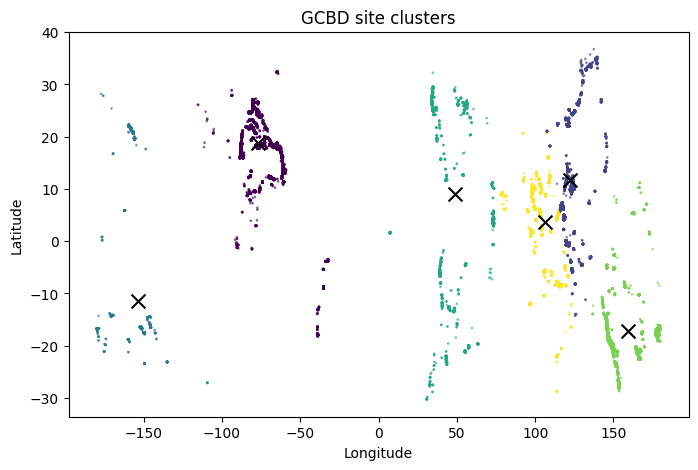

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(gcbd['Longitude_Degrees'], gcbd['Latitude_Degrees'],
            c=gcbd['cluster'], s=1, alpha=0.5)
plt.scatter(centroids['centroid_lon'], centroids['centroid_lat'],
            c='k', marker='x', s=100)
plt.xlabel('Longitude'); plt.ylabel('Latitude')
plt.title('GCBD site clusters')
plt.show()
